In [1]:
import pandas as pd
import os

In [2]:
file_path = '../data/processed/df_eda_consolidated.csv'

df = pd.read_csv(file_path)

print("DataFrame carregado com sucesso!")
print("\n--- Primeiras 5 linhas do DataFrame ---")

df.head()


DataFrame carregado com sucesso!

--- Primeiras 5 linhas do DataFrame ---


,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value,target,sector,year_established,revenue,employees,office_location,subsidiary_of,series,sales_price,manager,regional_office
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,Won,2016-10-20,2017-03-01,1054.0,0,retail,2001.0,718.62,2448.0,United States,NaN,GTX,1096.0,Dustin Brinkmann,Central
1,Z063OYW0,Darcel Schlecht,GTXPro,Isdom,Won,2016-10-25,2017-03-11,4514.0,0,medical,2002.0,3178.24,4540.0,United States,NaN,NaN,NaN,Melvin Marxen,Central
2,EC4QE1BX,Darcel Schlecht,MG Special,Cancity,Won,2016-10-25,2017-03-07,50.0,0,retail,2001.0,718.62,2448.0,United States,NaN,MG,55.0,Melvin Marxen,Central
3,MV1LWRNH,Moses Frase,GTX Basic,Codehow,Won,2016-10-25,2017-03-09,588.0,0,software,1998.0,2714.90,2641.0,United States,Acme Corporation,GTX,550.0,Dustin Brinkmann,Central
4,PE84CX4O,Zane Levy,GTX Basic,Hatfan,Won,2016-10-25,2017-03-02,517.0,0,services,1982.0,792.46,1299.0,United States,NaN,GTX,550.0,Summer Sewald,West


In [3]:
print("\n--- Informações do DataFrame ---")
print(df.info())
print("\n--- Fim do carregamento ---")


--- Informações do DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8800 entries, 0 to 8799
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   opportunity_id    8800 non-null   object 
 1   sales_agent       8800 non-null   object 
 2   product           8800 non-null   object 
 3   account           7375 non-null   object 
 4   deal_stage        8800 non-null   object 
 5   engage_date       8300 non-null   object 
 6   close_date        6711 non-null   object 
 7   close_value       6711 non-null   float64
 8   target            8800 non-null   int64  
 9   sector            7375 non-null   object 
 10  year_established  7375 non-null   float64
 11  revenue           7375 non-null   float64
 12  employees         7375 non-null   float64
 13  office_location   7375 non-null   object 
 14  subsidiary_of     1292 non-null   object 
 15  series            7320 non-null   object 
 16  sales_pr

# --- 1. Tratamento de Valores Ausentes ---

In [4]:
print("\n--- Contagem de Valores Ausentes por Coluna ---")
print(df.isnull().sum())


--- Contagem de Valores Ausentes por Coluna ---
opportunity_id         0
sales_agent            0
product                0
account             1425
deal_stage             0
engage_date          500
close_date          2089
close_value         2089
target                 0
sector              1425
year_established    1425
revenue             1425
employees           1425
office_location     1425
subsidiary_of       7508
series              1480
sales_price         1480
manager                0
regional_office        0
dtype: int64


In [5]:
print("\n--- Porcentagem de Valores Ausentes por Coluna ---")
print((df.isnull().sum() / len(df) * 100).sort_values(ascending=False))


--- Porcentagem de Valores Ausentes por Coluna ---
subsidiary_of       85.318182
close_date          23.738636
close_value         23.738636
sales_price         16.818182
series              16.818182
revenue             16.193182
employees           16.193182
office_location     16.193182
year_established    16.193182
sector              16.193182
account             16.193182
engage_date          5.681818
product              0.000000
opportunity_id       0.000000
sales_agent          0.000000
target               0.000000
deal_stage           0.000000
manager              0.000000
regional_office      0.000000
dtype: float64


## --- 1.1. Preenchimento de Valores Ausentes ---

In [6]:
# Colunas Categóricas com NaN para preencher com valores em Inglês
df['subsidiary_of'] = df['subsidiary_of'].fillna('Not_Subsidiary')
df['sector'] = df['sector'].fillna('Unknown_Sector')
df['office_location'] = df['office_location'].fillna('Unknown_Location')
df['account'] = df['account'].fillna('Unknown_Account')
df['series'] = df['series'].fillna('Unknown_Series')

In [7]:
# Colunas Numéricas com NaN para preencher com a Mediana (sem alteração)
median_revenue = df['revenue'].median()
median_employees = df['employees'].median()
median_year_established = df['year_established'].median()
median_sales_price = df['sales_price'].median()

df['revenue'] = df['revenue'].fillna(median_revenue)
df['employees'] = df['employees'].fillna(median_employees)
df['year_established'] = df['year_established'].fillna(median_year_established)
df['sales_price'] = df['sales_price'].fillna(median_sales_price)

In [8]:
# Para close_value, usaremos a coluna 'close_value_filled' que já foi tratada
if 'close_value_filled' not in df.columns:
    df['close_value_filled'] = df['close_value'].fillna(0)
    print("Coluna 'close_value_filled' criada/atualizada com NaNs preenchidos por 0.")

Coluna 'close_value_filled' criada/atualizada com NaNs preenchidos por 0.


In [9]:
# Verificar novamente os valores ausentes após o preenchimento
print("\n--- Porcentagem de Valores Ausentes por Coluna APÓS PREENCHIMENTO ---")
print((df.isnull().sum() / len(df) * 100).sort_values(ascending=False))


--- Porcentagem de Valores Ausentes por Coluna APÓS PREENCHIMENTO ---
close_date            23.738636
close_value           23.738636
engage_date            5.681818
opportunity_id         0.000000
account                0.000000
product                0.000000
sales_agent            0.000000
deal_stage             0.000000
target                 0.000000
sector                 0.000000
year_established       0.000000
revenue                0.000000
employees              0.000000
office_location        0.000000
subsidiary_of          0.000000
series                 0.000000
sales_price            0.000000
manager                0.000000
regional_office        0.000000
close_value_filled     0.000000
dtype: float64


# --- 2. Engenharia de Features ---

## 2.1. Conversão de Datas para datetime

In [10]:
# Coerção de erros 'coerce' converterá valores inválidos para NaT (Not a Time)
df['engage_date'] = pd.to_datetime(df['engage_date'], errors='coerce')
df['close_date'] = pd.to_datetime(df['close_date'], errors='coerce')

## 2.2. Criação da feature 'opportunity_duration_days'

In [11]:
# Para garantir que não haja durações negativas ou zero que possam ser erros
# Calculamos a diferença e preenchemos NaNs (resultantes de NaT nas datas)
# com um valor neutro ou que indique 'desconhecido' para a duração, ou filtramos.
# Como já fizemos na EDA, vamos recriar com tratamento similar.
df['opportunity_duration_days'] = (df['close_date'] - df['engage_date']).dt.days

# Preencher NaNs na duração: Para oportunidades onde close_date ou engage_date eram NaT
# Ou para casos onde não faz sentido ter duração (ex: target=1 e close_value=0, mas sem close_date)
# Uma estratégia é preencher com a mediana das durações positivas, ou 0, ou -1 para indicar "não aplicável/desconhecido".
# Dado que 'close_date' e 'engage_date' ainda têm NaNs, a 'opportunity_duration_days' também terá NaNs.
# Vamos preencher os NaNs de 'opportunity_duration_days' com a mediana das durações **válidas**.
median_duration = df['opportunity_duration_days'].median()
df['opportunity_duration_days'] = df['opportunity_duration_days'].fillna(median_duration)

# Tratar durações <= 0 como um valor específico ou 0, se for um erro de dados
df['opportunity_duration_days'] = df['opportunity_duration_days'].apply(lambda x: 0 if x <= 0 else x)

In [12]:
print("\n--- Informações do DataFrame após conversão de datas e criação de duração ---")
print(df[['engage_date', 'close_date', 'opportunity_duration_days']].info())


--- Informações do DataFrame após conversão de datas e criação de duração ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8800 entries, 0 to 8799
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   engage_date                8300 non-null   datetime64[ns]
 1   close_date                 6711 non-null   datetime64[ns]
 2   opportunity_duration_days  8800 non-null   float64       
dtypes: datetime64[ns](2), float64(1)
memory usage: 206.4 KB
None


In [13]:
print("\n--- Estatísticas descritivas da Duração da Oportunidade (em dias) ---")
print(df['opportunity_duration_days'].describe())


--- Estatísticas descritivas da Duração da Oportunidade (em dias) ---
count    8800.000000
mean       47.276705
std        35.876598
min         1.000000
25%        10.000000
50%        45.000000
75%        76.000000
max       138.000000
Name: opportunity_duration_days, dtype: float64


In [14]:
print("\n--- Porcentagem de Valores Ausentes após criação de 'opportunity_duration_days' ---")
print((df.isnull().sum() / len(df) * 100).sort_values(ascending=False))


--- Porcentagem de Valores Ausentes após criação de 'opportunity_duration_days' ---
close_date                   23.738636
close_value                  23.738636
engage_date                   5.681818
sales_agent                   0.000000
opportunity_id                0.000000
deal_stage                    0.000000
account                       0.000000
product                       0.000000
target                        0.000000
sector                        0.000000
year_established              0.000000
revenue                       0.000000
employees                     0.000000
office_location               0.000000
subsidiary_of                 0.000000
series                        0.000000
sales_price                   0.000000
manager                       0.000000
regional_office               0.000000
close_value_filled            0.000000
opportunity_duration_days     0.000000
dtype: float64


# --- 3. Codificação de Variáveis Categóricas ---

In [15]:
# Identificar colunas categóricas (object ou que sabemos que são categóricas)
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Excluir IDs e as colunas de data originais que serão substituídas pela duração.
# 'opportunity_id' e 'account' são IDs e geralmente não são usadas diretamente na modelagem.
# 'close_value' original não será usada, usaremos 'close_value_filled'.
# 'target' é a variável alvo, não deve ser codificada agora.
cols_to_encode = [col for col in categorical_cols if col not in ['opportunity_id', 'account', 'engage_date', 'close_date', 'close_value', 'target']]


print(f"\nColunas categóricas identificadas para One-Hot Encoding: {cols_to_encode}")


Colunas categóricas identificadas para One-Hot Encoding: ['sales_agent', 'product', 'deal_stage', 'sector', 'office_location', 'subsidiary_of', 'series', 'manager', 'regional_office']


In [17]:
# Aplicar One-Hot Encoding
# drop_first=True para evitar a multicolinearidade e reduzir uma coluna por categoria
# dtype=int para garantir que as novas colunas sejam de inteiros (0 ou 1)
df_encoded = pd.get_dummies(df, columns=cols_to_encode, drop_first=True, dtype=int)

print("\n--- Informações do DataFrame após One-Hot Encoding ---")
# verbose=True e show_counts=True para ver todas as colunas e suas contagens de não-nulos
print(df_encoded.info(verbose=True, show_counts=True))


--- Informações do DataFrame após One-Hot Encoding ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8800 entries, 0 to 8799
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   opportunity_id                    8800 non-null   object        
 1   account                           8800 non-null   object        
 2   engage_date                       8300 non-null   datetime64[ns]
 3   close_date                        6711 non-null   datetime64[ns]
 4   close_value                       6711 non-null   float64       
 5   target                            8800 non-null   int64         
 6   year_established                  8800 non-null   float64       
 7   revenue                           8800 non-null   float64       
 8   employees                         8800 non-null   float64       
 9   sales_price                       8800 non-null   float64     

In [19]:
print("\n--- Primeiras 5 linhas do DataFrame codificado (após One-Hot Encoding) ---")
df_encoded.head()


--- Primeiras 5 linhas do DataFrame codificado (após One-Hot Encoding) ---


,opportunity_id,account,engage_date,close_date,close_value,target,year_established,revenue,employees,sales_price,...,series_GTX,series_MG,series_Unknown_Series,manager_Celia Rouche,manager_Dustin Brinkmann,manager_Melvin Marxen,manager_Rocco Neubert,manager_Summer Sewald,regional_office_East,regional_office_West
0,1C1I7A6R,Cancity,2016-10-20,2017-03-01,1054.0,0,2001.0,718.62,2448.0,1096.0,...,1,0,0,0,1,0,0,0,0,0
1,Z063OYW0,Isdom,2016-10-25,2017-03-11,4514.0,0,2002.0,3178.24,4540.0,1096.0,...,0,0,1,0,0,1,0,0,0,0
2,EC4QE1BX,Cancity,2016-10-25,2017-03-07,50.0,0,2001.0,718.62,2448.0,55.0,...,0,1,0,0,0,1,0,0,0,0
3,MV1LWRNH,Codehow,2016-10-25,2017-03-09,588.0,0,1998.0,2714.90,2641.0,550.0,...,1,0,0,0,1,0,0,0,0,0
4,PE84CX4O,Hatfan,2016-10-25,2017-03-02,517.0,0,1982.0,792.46,1299.0,550.0,...,1,0,0,0,0,0,0,1,0,1


# --- 4. Remover Colunas Não Mais Necessárias ---

In [20]:
# Colunas a serem removidas:
# - 'opportunity_id': ID único, não é uma feature preditiva.
# - 'account': ID da conta, similar ao opportunity_id para fins de feature.
# - 'engage_date', 'close_date': Já extraímos 'opportunity_duration_days'.
# - 'close_value': A versão tratada 'close_value_filled' será usada.
columns_to_drop = ['opportunity_id', 'account', 'engage_date', 'close_date', 'close_value']

df_final = df_encoded.drop(columns=columns_to_drop, errors='ignore') # 'errors='ignore' para evitar erro se a coluna já tiver sido removida

print(f"\nColunas removidas: {columns_to_drop}")
print("\n--- Informações do DataFrame após remoção de colunas ---")
print(df_final.info(verbose=True, show_counts=True))


Colunas removidas: ['opportunity_id', 'account', 'engage_date', 'close_date', 'close_value']

--- Informações do DataFrame após remoção de colunas ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8800 entries, 0 to 8799
Data columns (total 87 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   target                            8800 non-null   int64  
 1   year_established                  8800 non-null   float64
 2   revenue                           8800 non-null   float64
 3   employees                         8800 non-null   float64
 4   sales_price                       8800 non-null   float64
 5   close_value_filled                8800 non-null   float64
 6   opportunity_duration_days         8800 non-null   float64
 7   sales_agent_Boris Faz             8800 non-null   int64  
 8   sales_agent_Cassey Cress          8800 non-null   int64  
 9   sales_agent_Cecily Lampkin        8800 non-

In [21]:
# Verificar as primeiras linhas para confirmar
print("\n--- Primeiras 5 linhas do DataFrame final (após remoção de colunas) ---")
df_final.head()


--- Primeiras 5 linhas do DataFrame final (após remoção de colunas) ---


,target,year_established,revenue,employees,sales_price,close_value_filled,opportunity_duration_days,sales_agent_Boris Faz,sales_agent_Cassey Cress,sales_agent_Cecily Lampkin,...,series_GTX,series_MG,series_Unknown_Series,manager_Celia Rouche,manager_Dustin Brinkmann,manager_Melvin Marxen,manager_Rocco Neubert,manager_Summer Sewald,regional_office_East,regional_office_West
0,0,2001.0,718.62,2448.0,1096.0,1054.0,132.0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,0,2002.0,3178.24,4540.0,1096.0,4514.0,137.0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,0,2001.0,718.62,2448.0,55.0,50.0,133.0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,0,1998.0,2714.90,2641.0,550.0,588.0,135.0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,0,1982.0,792.46,1299.0,550.0,517.0,128.0,0,0,0,...,1,0,0,0,0,0,0,1,0,1


# --- 5. Escalonamento de Variáveis Numéricas ---

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
# Identificar as colunas numéricas para escalonar
# Excluímos 'target' pois é nossa variável dependente e já é 0 ou 1
numeric_cols = ['year_established', 'revenue', 'employees', 'sales_price', 'close_value_filled', 'opportunity_duration_days']

print(f"\nColunas numéricas para escalonamento: {numeric_cols}")


Colunas numéricas para escalonamento: ['year_established', 'revenue', 'employees', 'sales_price', 'close_value_filled', 'opportunity_duration_days']


In [26]:
# Inicializar o StandardScaler
scaler = StandardScaler()

# Aplicar o escalonamento nas colunas numéricas
# Fit and transform em um único passo
df_final[numeric_cols] = scaler.fit_transform(df_final[numeric_cols])

print("\n--- Estatísticas Descritivas das Colunas Numéricas Após Escalonamento ---")
df_final[numeric_cols].describe()


--- Estatísticas Descritivas das Colunas Numéricas Após Escalonamento ---


,year_established,revenue,employees,sales_price,close_value_filled,opportunity_duration_days
count,8.800000e+03,8.800000e+03,8.800000e+03,8.800000e+03,8.800000e+03,8.800000e+03
mean,-9.780056e-17,-1.469532e-16,-1.937844e-17,-1.614870e-17,-6.459479e-17,5.167584e-17
std,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00
min,-1.950284e+00,-9.770450e-01,-8.477060e-01,-7.052859e-01,-5.354565e-01,-1.289959e+00
25%,-6.425926e-01,-6.786835e-01,-5.967856e-01,-4.996368e-01,-5.354565e-01,-1.039085e+00
50%,-4.818736e-02,-2.693890e-01,-2.942191e-01,-2.727997e-01,-5.354565e-01,-6.346293e-02
75%,5.462179e-01,1.991199e-01,1.793356e-01,6.814951e-01,-2.436767e-02,8.006592e-01
max,2.567196e+00,3.908805e+00,4.599603e+00,1.039270e+01,1.372841e+01,2.528903e+00


In [27]:
# Verificar as primeiras linhas para ver o impacto do escalonamento
print("\n--- Primeiras 5 linhas do DataFrame Final (após escalonamento) ---")
df_final.head()


--- Primeiras 5 linhas do DataFrame Final (após escalonamento) ---


,target,year_established,revenue,employees,sales_price,close_value_filled,opportunity_duration_days,sales_agent_Boris Faz,sales_agent_Cassey Cress,sales_agent_Cecily Lampkin,...,series_GTX,series_MG,series_Unknown_Series,manager_Celia Rouche,manager_Dustin Brinkmann,manager_Melvin Marxen,manager_Rocco Neubert,manager_Summer Sewald,regional_office_East,regional_office_West
0,0,0.665099,-0.678683,-0.460122,-0.272800,-0.039085,2.361654,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,0,0.783980,0.349011,-0.127680,-0.272800,1.590372,2.501029,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,0,0.665099,-0.678683,-0.460122,-0.705286,-0.511909,2.389529,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,0,0.308456,0.155415,-0.429452,-0.499637,-0.258543,2.445279,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,0,-1.593641,-0.647831,-0.642711,-0.499637,-0.291980,2.250154,0,0,0,...,1,0,0,0,0,0,0,1,0,1


# --- 6. Preparação para Modelagem: Separar X e y, e Dividir em Treino/Teste ---


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
# Separar Features (X) e Variável Alvo (y)
X = df_final.drop('target', axis=1) # Todas as colunas, exceto 'target'
y = df_final['target'] # A coluna 'target'

print(f"\nFormato de X (Features): {X.shape}")
print(f"Formato de y (Target): {y.shape}")


Formato de X (Features): (8800, 86)
Formato de y (Target): (8800,)


In [30]:
# Dividir os dados em conjuntos de treinamento e teste
# test_size=0.2 (20% para teste, 80% para treino)
# random_state para reprodutibilidade
# stratify=y para garantir que a proporção de classes (0 e 1, ganhos e perdas) seja mantida em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nFormato de X_train: {X_train.shape}")
print(f"Formato de X_test: {X_test.shape}")
print(f"Formato de y_train: {y_train.shape}")
print(f"Formato de y_test: {y_test.shape}")


Formato de X_train: (7040, 86)
Formato de X_test: (1760, 86)
Formato de y_train: (7040,)
Formato de y_test: (1760,)


In [31]:
# Verificar a proporção da classe alvo nos conjuntos de treino e teste
print("\nProporção da classe alvo em y_train:")
print(y_train.value_counts(normalize=True))
print("\nProporção da classe alvo em y_test:")
print(y_test.value_counts(normalize=True))


Proporção da classe alvo em y_train:
target
0    0.719034
1    0.280966
Name: proportion, dtype: float64

Proporção da classe alvo em y_test:
target
0    0.71875
1    0.28125
Name: proportion, dtype: float64


## --- 6.1. Modelo Baseline: Previsor da Classe Majoritária ---

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
# A classe majoritária é a que ocorre com mais frequência no conjunto de treino
# y_train.value_counts() mostra:
# target
# 0    5062 (aproximadamente 71.9%)
# 1    1978 (aproximadamente 28.1%)
# Portanto, a classe majoritária é 0.

# Criar previsões baseline: simplesmente prever a classe majoritária para todas as instâncias
# A classe majoritária é 0 (oportunidade GANHA)
y_pred_baseline = [y_train.mode()[0]] * len(y_test)

print("\n--- Relatório de Classificação do Modelo Baseline (Classe Majoritária) ---")
print(classification_report(y_test, y_pred_baseline, zero_division=0)) # zero_division=0 para evitar warnings com f1-score quando a classe minoritária não é prevista



--- Relatório de Classificação do Modelo Baseline (Classe Majoritária) ---
              precision    recall  f1-score   support

           0       0.72      1.00      0.84      1265
           1       0.00      0.00      0.00       495

    accuracy                           0.72      1760
   macro avg       0.36      0.50      0.42      1760
weighted avg       0.52      0.72      0.60      1760



In [38]:
print("\n--- Matriz de Confusão do Modelo Baseline ---")
cm_baseline = confusion_matrix(y_test, y_pred_baseline)
print(cm_baseline)


--- Matriz de Confusão do Modelo Baseline ---
[[1265    0]
 [ 495    0]]


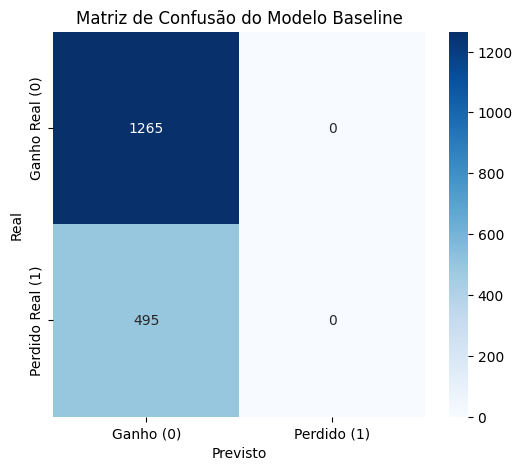

In [39]:
# Visualizar a Matriz de Confusão do Baseline
plt.figure(figsize=(6, 5))
sns.heatmap(cm_baseline, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ganho (0)', 'Perdido (1)'],
            yticklabels=['Ganho Real (0)', 'Perdido Real (1)'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão do Modelo Baseline')
plt.show()

# --- 7. Modelagem: Treinamento do Modelo de Regressão Logística ---

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

## 7.1. Instanciar o Modelo

In [41]:
# Usar solver='liblinear' é robusto para datasets menores e para penalidade L1/L2
# random_state para reprodutibilidade
model = LogisticRegression(solver='liblinear', random_state=42)

## 7.2. Treinar o Modelo

In [43]:
# O modelo aprende os padrões a partir dos dados de treinamento
model.fit(X_train, y_train)
print("\n--- Modelo de Regressão Logística Treinado com Sucesso! ---")


--- Modelo de Regressão Logística Treinado com Sucesso! ---


# --- 8. Avaliação do Modelo (Primeiras Métricas) ---

# 8.1. Fazer Previsões no conjunto de Teste

In [44]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1] # Probabilidade da classe positiva (target = 1, ou seja, 'perda')

print("\n--- Relatório de Classificação no Conjunto de Teste ---")
print(classification_report(y_test, y_pred))


--- Relatório de Classificação no Conjunto de Teste ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1265
           1       1.00      1.00      1.00       495

    accuracy                           1.00      1760
   macro avg       1.00      1.00      1.00      1760
weighted avg       1.00      1.00      1.00      1760



In [45]:
print("\n--- Matriz de Confusão ---")
cm = confusion_matrix(y_test, y_pred)
print(cm)


--- Matriz de Confusão ---
[[1265    0]
 [   0  495]]


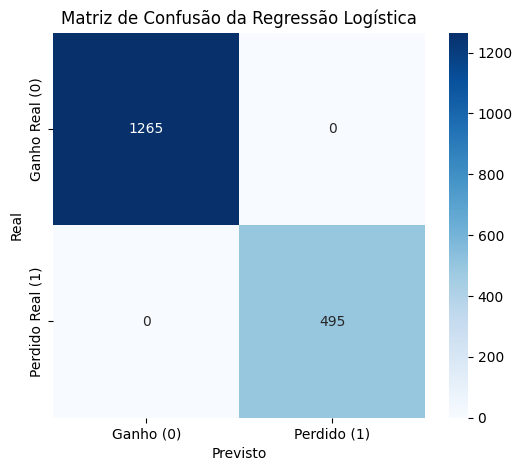

In [46]:
# Visualizar a Matriz de Confusão
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ganho (0)', 'Perdido (1)'],
            yticklabels=['Ganho Real (0)', 'Perdido Real (1)'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão da Regressão Logística')
plt.show()

In [47]:
# Calcular e Imprimir AUC-ROC
auc_roc = roc_auc_score(y_test, y_prob)
print(f"\nAUC-ROC Score: {auc_roc:.4f}")


AUC-ROC Score: 1.0000


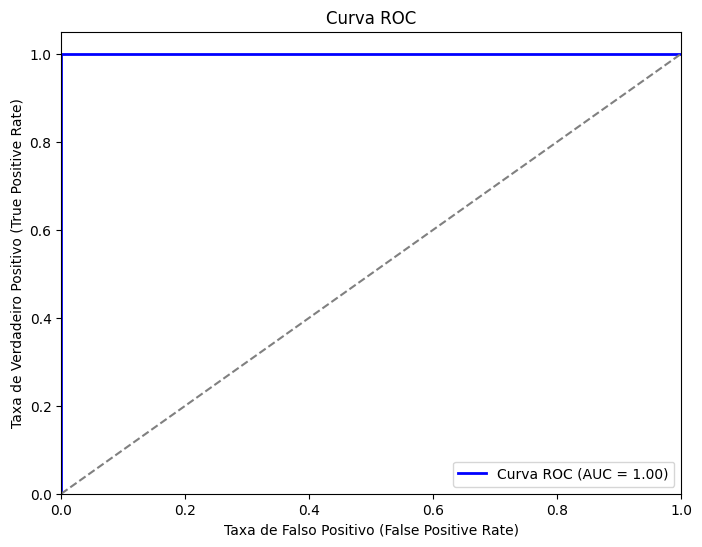

In [48]:
# Plotar Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Curva ROC (AUC = {auc_roc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo (False Positive Rate)')
plt.ylabel('Taxa de Verdadeiro Positivo (True Positive Rate)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

# --- 9. Reavaliação do Modelo para Mitigar Data Leakage ---

In [49]:
# Contexto: O modelo anterior obteve uma performance perfeita (AUC = 1.00),
# o que é um forte indicativo de Data Leakage.
# Data Leakage ocorre quando uma feature contém informação do target que não estaria
# disponível em um cenário de produção (no momento da previsão).

# Suspeito principal: 'close_value_filled'.
# Esta feature foi criada preenchendo NaNs do 'close_value' original com 0.
# Ocorre que, para oportunidades perdidas (target=1), o 'close_value' original é NaN (e, portanto, 'close_value_filled' é 0).
# Para oportunidades ganhas (target=0), 'close_value' tem um valor positivo (e 'close_value_filled' também é positivo).
# Isso cria uma correlação quase perfeita, "vazando" a resposta para o modelo.
# Em um cenário real, o valor final de 'close_value' (e se ele seria 0 por perda)
# não estaria disponível para uma oportunidade em andamento que se busca prever.

# Ação: Remover 'close_value_filled' das features (X) para simular um cenário mais realista
# onde o modelo precisa prever a perda *antes* de ter o valor final de fechamento.

In [52]:
# Separar Features (X_revisited) e Variável Alvo (y) novamente
# Excluindo 'target' e 'close_value_filled' das features.
X_revisited = df_final.drop(['target', 'close_value_filled'], axis=1)
y = df_final['target']

print(f"\nFormato de X_revisited (Features após remoção de close_value_filled): {X_revisited.shape}")


Formato de X_revisited (Features após remoção de close_value_filled): (8800, 85)


In [53]:
# Dividir os dados em conjuntos de treinamento e teste novamente
# É crucial refazer a divisão após alterar X para garantir que os conjuntos
# X_train_revisited, X_test_revisited, y_train, y_test sejam consistentes com X_revisited e y.
# O random_state=42 e stratify=y são mantidos para reprodutibilidade e balanceamento de classes.
X_train_revisited, X_test_revisited, y_train, y_test = train_test_split(
    X_revisited, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nFormato de X_train_revisited: {X_train_revisited.shape}")
print(f"Formato de X_test_revisited: {X_test_revisited.shape}")


Formato de X_train_revisited: (7040, 85)
Formato de X_test_revisited: (1760, 85)


In [55]:
# Instanciar e Treinar o Modelo de Regressão Logística novamente
# O solver='liblinear' é robusto e adequado para este tipo de dataset.
model_revisited = LogisticRegression(solver='liblinear', random_state=42)
model_revisited.fit(X_train_revisited, y_train)

print("\n--- Modelo de Regressão Logística Treinado Novamente (Sem Data Leakage de 'close_value_filled') ---")


--- Modelo de Regressão Logística Treinado Novamente (Sem Data Leakage de 'close_value_filled') ---


In [56]:
# Fazer Previsões e Avaliar o Modelo Revisitado
y_pred_revisited = model_revisited.predict(X_test_revisited)
# y_prob_revisited é a probabilidade da classe positiva (target = 1, ou seja, 'perda')
y_prob_revisited = model_revisited.predict_proba(X_test_revisited)[:, 1]

print("\n--- Relatório de Classificação no Conjunto de Teste (Modelo Revisitado) ---")
print(classification_report(y_test, y_pred_revisited))


--- Relatório de Classificação no Conjunto de Teste (Modelo Revisitado) ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1265
           1       1.00      1.00      1.00       495

    accuracy                           1.00      1760
   macro avg       1.00      1.00      1.00      1760
weighted avg       1.00      1.00      1.00      1760



In [57]:
print("\n--- Matriz de Confusão (Modelo Revisitado) ---")
cm_revisited = confusion_matrix(y_test, y_pred_revisited)
print(cm_revisited)


--- Matriz de Confusão (Modelo Revisitado) ---
[[1265    0]
 [   0  495]]


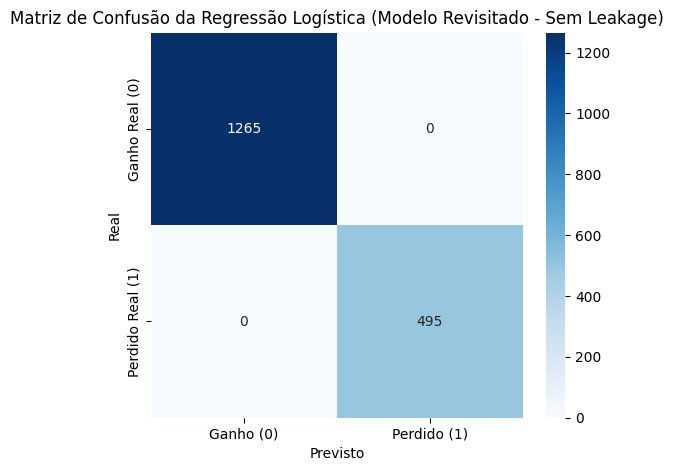

In [58]:
# Visualizar a Matriz de Confusão
plt.figure(figsize=(6, 5))
sns.heatmap(cm_revisited, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ganho (0)', 'Perdido (1)'],
            yticklabels=['Ganho Real (0)', 'Perdido Real (1)'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão da Regressão Logística (Modelo Revisitado - Sem Leakage)')
plt.show()

In [59]:
# Calcular e Imprimir AUC-ROC
auc_roc_revisited = roc_auc_score(y_test, y_prob_revisited)
print(f"\nAUC-ROC Score (Modelo Revisitado - Sem Leakage): {auc_roc_revisited:.4f}")


AUC-ROC Score (Modelo Revisitado - Sem Leakage): 1.0000


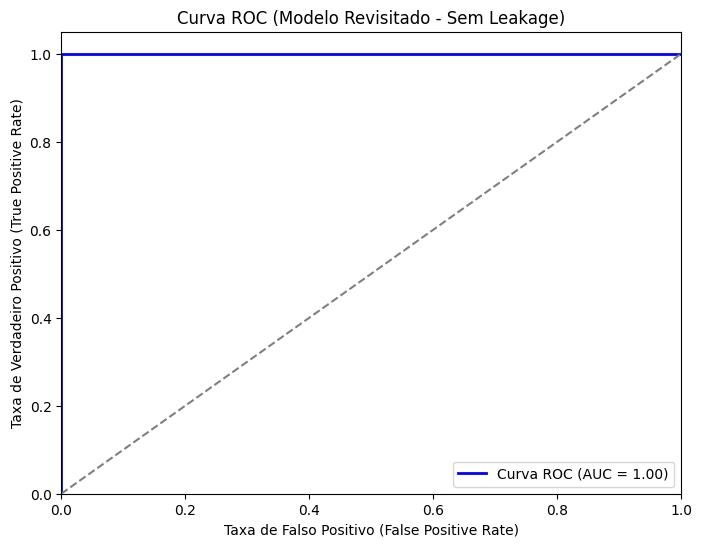

In [60]:
# Plotar Curva ROC
fpr_revisited, tpr_revisited, thresholds_revisited = roc_curve(y_test, y_prob_revisited)
plt.figure(figsize=(8, 6))
plt.plot(fpr_revisited, tpr_revisited, color='blue', lw=2, label=f'Curva ROC (AUC = {auc_roc_revisited:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo (False Positive Rate)')
plt.ylabel('Taxa de Verdadeiro Positivo (True Positive Rate)')
plt.title('Curva ROC (Modelo Revisitado - Sem Leakage)')
plt.legend(loc="lower right")
plt.show()

In [62]:
# Analisando a relação entre 'deal_stage' e 'target' no DataFrame original (df)
# para entender o possível data leakage.
# Se o df original não tiver mais essas colunas, podemos verificar no df_encoded antes de dropar.

# Se 'deal_stage' foi codificado em df_encoded e a coluna original foi removida,
# vamos verificar a relação entre as novas colunas one-hot de 'deal_stage' e o 'target'.
# Assumindo que o df_encoded ainda existe e contem as colunas deal_stage_X (após o OHE)

# Pegar as colunas criadas a partir de 'deal_stage' no df_encoded
deal_stage_encoded_cols = [col for col in X_revisited.columns if 'deal_stage' in col]

print("\n--- Correlação entre colunas de 'deal_stage' codificadas e o 'target' ---")
# Concatenar o target com as features relevantes para calcular a correlação
temp_df_correlation = pd.concat([X_revisited[deal_stage_encoded_cols], y], axis=1)
print(temp_df_correlation.corr()['target'].sort_values(ascending=False))


--- Correlação entre colunas de 'deal_stage' codificadas e o 'target' ---
deal_stage_Lost           1.000000
target                    1.000000
deal_stage_Prospecting   -0.153447
deal_stage_Won           -0.602582
Name: target, dtype: float64


In [63]:
print("\n--- Contagem de target por cada tipo de deal_stage (no DataFrame df original, se disponível) ---")
# Idealmente, faríamos isso no DF antes do OHE
# Se você ainda tiver o DataFrame 'df' (antes do One-Hot Encoding e remoções), rode:
# print(df.groupby('deal_stage')['target'].value_counts(normalize=True))

# Se o 'df' original não estiver disponível neste ponto, podemos tentar inferir a partir das colunas OHE.
# Por exemplo, se 'deal_stage_Lost' tem correlação muito alta com 'target', já é um indício.


--- Contagem de target por cada tipo de deal_stage (no DataFrame df original, se disponível) ---
